<style id='Notebook Preview Styling & Formatting'>
h1 {
  font-size:40px;
}
.Author {
  color: green;
  font-size: 22px;
}
h2{
  font-size: 22px;
}
table {
  font-size: 18px;
}
.Bold {
  font-weight: bold;
}
.Thin {
  font-weight: lighter;
}
p {
  font-size: 8px;
  color: transparent;
}
.Smaller {
  font-size: 13px;
}
.Smaller-Thin {
  font-size: 13px;
  font-weight: lighter;
}
.Italic {
  font-style: italic;
}
.Smaller-Italic {
  font-size: 13px;
  font-style: italic;
}
</style>

<h1> Multipurpose Financial Data Processor </h1>
<h2 class='Author'> Author: Reid Clark, Updated: February 11, 2024 </h2>

<p class='Hidden Element'>                 TABLE OF CONTENTS                                                 </p>
<table id='Table of Contents'>
    
  <tr id='Row 1 - Table of Contents'>
      <td class='Bold' colspan="2">Table of Contents</td>
    </tr>

  <tr id='Row 2 - Table of Contents'>
      <td>---</td>
      <td>About (Capabilities)</td>
    </tr>

  <tr id='Row 3 - Table of Contents'>
      <td>Sec. 1</td>
      <td class='Thin'>Demo Run the MFDP Here - Apple Inc./'AAPL'</td>
    </tr>

  <tr id='Row 4 - Table of Contents'>
      <td>Sec. 2</td>
      <td class='Thin'>View the MFDP Raw Code for Manual Valuation Calculations</td>
    </tr>

  <tr id='Row 5 - Table of Contents'>
      <td>Sec. 3</td>
      <td class='Thin'>View the MFDP Raw Code for GARCH Model (Generalized Autoregressive Conditional Heteroskedasticity) (Demo)</td>
    </tr>

</table>

<p class='Hidden Element'>                   BLANK SPACE                                                       </p>

<table id='About (Capabilites)'>
  <tr>
    <td class ='Bold'>About (Capabilities)</td>
  </tr>
  <tr>
    <td class='Thin'>
    <bul class='BULLET'>
    Fetch Live (Per Second) Stock Data from NYSE, NASDAQ, LSE and TSE via Yahoo Finance Web API
    <bul>
    </td>
  </tr>
  <tr>
    <td class='Thin'>Calculate Current Valuation Measures for Fundamental Analysis</td>
  </tr>
    <td class='Thin'>Predict Market Volatility with GARCH Regression Model & Forecasting for Predictive Price Targets</td>
  </tr>
  <tr>
    <td class='Thin'>Live Data Visualization for Cluster Bounds Graphing</td>
  </tr>
  <tr>
    <td class='Thin'>Sample Txt</td>
  </tr>
</table>

<p class='Hidden Element'>                   BLANK SPACE                                                       </p>

# Instructions:
---
### Modify the following parameters:

In [126]:
ticker_input = 'AC.TO'
period_input = '1y'

Ticker Name: AC.TO
Date of Most Recent Info: 2022-12-31
Diluted EPS: -4.75
Weighted Average Cost of Capital (WACC): 15.02%
Enterprise Value: $20,198,075,683.88
Current Price: $18.37
Implied Share Price: -$19.61
Acceptable Buy Price Given Margin of Safety (0.30 or 30%): -$13.73
Sell


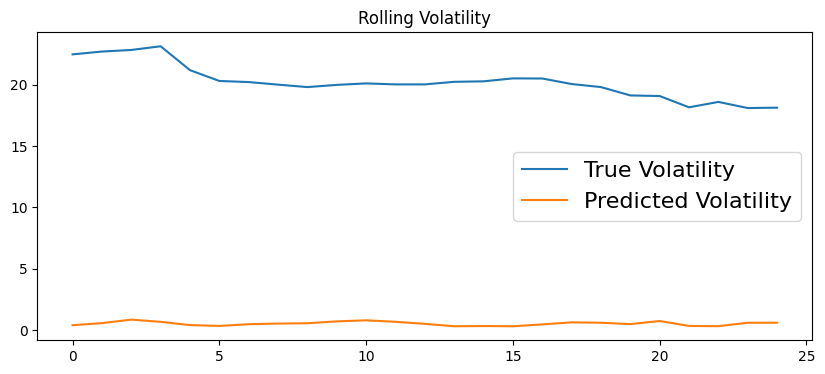

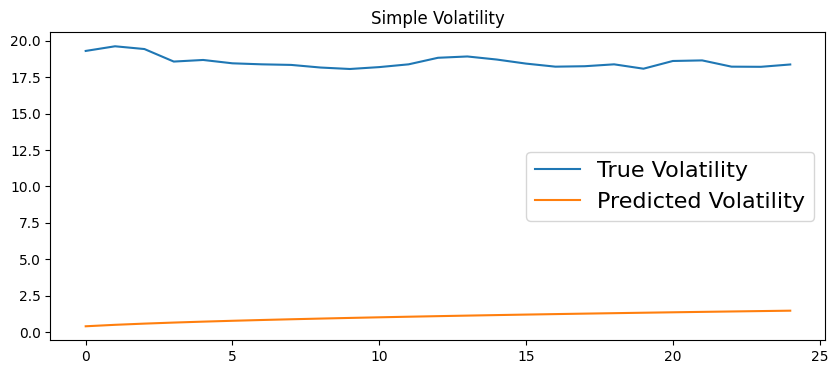

In [127]:
import ipywidgets as widgets
from ipywidgets import interact, Button
from IPython.display import display, HTML

import numpy as np
import pandas as pd
import pandas_datareader as web
## Set no limit in number of rows / columns displayed for large datasets of stocks:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests
# Fetch TwelveData Earnings Data
#api_key = '1cd34981158f47d2933af4113984b78a'
#endpoint = f'https://api.twelvedata.com/earnings?symbol={ticker_input}&apikey={api_key}'
#getreq = requests.get(endpoint)
#if getreq.status_code == 200:
#    parsed_data = getreq.json()
#print(parsed_data)

from datetime import datetime, timedelta
from decimal import Decimal
import locale
## Format values as $USD
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

import math
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

import yfinance as yf
import yahoo_fin.stock_info as si

def garch():
    def garchgrapher():
        # Plot Rolling Vol.
        plt.figure(figsize=(10,4))
        plt.title('Rolling Volatility')
        true, = plt.plot((np_yf_cvals[:-test_size-i])[:len(rolling_predictions)])
        preds, = plt.plot(rolling_predictions)
        plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)
        
        # Plot Simple Vol.
        plt.figure(figsize=(10,4))
        plt.title('Simple Volatility')
        true, = plt.plot(np_yf_cvals[-test_size:])
        preds, = plt.plot((np.sqrt(predictions.variance.values[-1,:])))
        plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)
    
    # Part 2 - GARCH #
    # Reset close vals to ensure data sufficiency
    yf_ticker = yf.Ticker(ticker_input)
    yf_hist = yf_ticker.history(period=(period_input))
    pd_yf_hist = pd.DataFrame(yf_hist)
    yf_cvals = pd_yf_hist['Close']
    np_yf_cvals = np.array([yf_cvals][0])

    # Unhash below to show PCAF plot
    #plot_pacf(np_yf_cvals**2)
    #plt.show()

    # Establish variables
    n = len(np_yf_cvals)
    omega = 0.5
    alpha_1 = 0.1
    alpha_2 = 0.2
    beta_1 = 0.3
    beta_2 = 0.5

    # Compress results for n to scale large data
    test_size = int(n*0.1)

    # Create loop to identify volatilities (vols). Append vols to list.
    vols_list = [1,1]
    for i in range(n-1):
        vol = np.sqrt(omega + alpha_1*np_yf_cvals[-1]**2 + alpha_2*np_yf_cvals[-2]**2 + beta_1*vols_list[-1]**2 + beta_2*vols_list[-2]**2)
        vols_list.append(vol)

    # Train model
    train, test = np_yf_cvals[:-test_size], np_yf_cvals[-test_size:]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    
    ## Simple Volatility Forecast
    predictions = model_fit.forecast(horizon=test_size)

    ## Rolling Volatility Forecast
    rolling_predictions = []
    for i in range(test_size):
        train = np_yf_cvals[:-(test_size-i)]
        model = arch_model(train, p=1, q=1)
        model_fit = model.fit(disp='off')
        pred = model_fit.forecast(horizon=1)
        rolling_predictions.append((np.sqrt(pred.variance.values[-1,:][0])))
    
    garchgrapher()


def start_function():

    ## Currency formatter function
    def currency_formatter(value):
        return locale.currency(value, grouping=True)

    # Part 1 - Fundamental Analysis #
    def main():
        def all():
            ## Sample Stock Input: Apple / AAPL
            stock1 = yf.Ticker(ticker_input)
            ## String slice & print
            print(f'Ticker Name: {ticker_input}')

            ## Set "S&P 500 Index" as the Industry Sector for all Beta Calculations
            market_index = yf.Ticker('^GSPC') # ...so S&P 500 only

            def main_body():
                def wacc_and_related():
                    def dcf_model():
                        def enterprise_valuator():
                            
                            ## Find enterprise value
                            ent_val = mkt_cap + total_debt - cash_and_ce
                            print(f'Enterprise Value: {currency_formatter(ent_val)}')

                            ## Calculate equity value of ticker (convert from ent_val)
                            equity_val = mkt_cap + cash_and_ce - total_debt
                            
                            ## Find Implied Share Price
                            implied_share_price = equity_val / no_of_shares

                            ## Print Current price
                            print(f'Current Price: {currency_formatter(current_price)}')
                            ## Print ISP
                            print(f'Implied Share Price: {currency_formatter(implied_share_price)}')

                            ## Find pct difference between current price and implied share price
                            dif = (current_price/implied_share_price)

                            ## Establish Margin of Safety
                            mrg_of_sfty = 0.30

                            acceptable_buy_price = (1 - mrg_of_sfty)*implied_share_price
                            print(f'Acceptable Buy Price Given Margin of Safety (0.30 or 30%): {currency_formatter(acceptable_buy_price)}')

                            if current_price > acceptable_buy_price:
                                print('Sell')
                            #ROUND HOLD TO NEAREST (BOUNDS)
                            elif current_price == acceptable_buy_price:
                                print('Hold')
                            else:
                                print('Buy')

                        ## Discounted Cash Flow Model Calculator
                        ## 1) Find FCF (Free Cash Flow)
                        fcf = cashflow_st['Free Cash Flow']

                        ## 2) Calculate Market Growth Rate. ('*2' as it is a ...
                        ## ... 6mo period. 'iloc' for more-accurate integer key (less output text desc.)
                        annual_g = (market_returns.iloc[-1] - market_returns.iloc[0])*2
                        
                        ## 3) Calculate Terminal Value using Perpetuity Growth Method
                        perp_growth_terminal_val = (fcf * (1 + annual_g)) / (wCoC - annual_g)

                        ## 4) Calculate Enterprise Value (ent_val)
                        enterprise_valuator()

                    ## Calculate WACC (wCoC)
                    wCoC = ((erp * beta) + rf) + cost_of_debt
                    final_wacc = wCoC*100
                    print(f'Weighted Average Cost of Capital (WACC): {round((final_wacc),2)}%')

                    ## Call DCF discounted cash flow model calculator
                    dcf_model()
                

                ## Find bal sheet, income statement & cashflow stmt for ticker
                scraped_dates = (stock1.balance_sheet.iloc[0]).index
                bal_sheet_date = (str(scraped_dates[0]))[:10]
                print(f'Date of Most Recent Info: {bal_sheet_date}')
                bal_sheet = stock1.balance_sheet[bal_sheet_date]
                inc_st = stock1.income_stmt[bal_sheet_date]
                cashflow_st = stock1.cashflow[bal_sheet_date]
                df_cashflow_st = pd.DataFrame(cashflow_st)

                ## Find EPS
                eps = inc_st["Diluted EPS"]
                print(f'Diluted EPS: {eps}')

                ## Find market cap & no. of shares for ticker
                mkt_cap = stock1.basic_info['marketCap']
                no_of_shares = bal_sheet['Ordinary Shares Number']
                
                ## Gather 6mo recent close value history for ticker,...
                ## ...arrange close values in pandas dataframe
                stock1_info = stock1.history
                df_stock1_info = pd.DataFrame(stock1_info(period=(period_input)))
                stock1_cvals = df_stock1_info['Close']
                
                ## Find Current Price
                current_price = stock1_cvals.iloc[-1]

                ## Find P/E
                pe_ratio = current_price / eps

                ## Gather 6mo recent close value history for market index...
                ## ...performance, ditto above
                ## arrange close values in pandas dataframe again
                market_data = market_index.history(period=(period_input))
                df_market_data = pd.DataFrame(market_data)

                ## Calculate stock and market returns (pct change) for ticker
                stock1_returns = (stock1_cvals.pct_change().dropna())
                market_returns = df_market_data['Close'].pct_change().dropna()
                
                ## Check if difference
                ## Equalized if different number of items
                ## Append to final list
                difference = int(len(stock1_returns) - len(market_returns))
                stock1_returns_equalized = []
                market_returns_equalized = []
                
                if difference > 0:
                    stock1_returns_equalized = stock1_returns.iloc[:-difference]
                    market_returns_equalized = market_returns
                elif difference < 0:
                    stock1_returns_equalized = stock1_returns
                    market_returns_equalized = market_returns.iloc[-difference:]
                else:
                    stock1_returns_equalized = stock1_returns
                    market_returns_equalized = market_returns

                ## Calculate covariance & variance of returns (ticker v market)
                ## MODIFY TO ADJUST FOR EQUALIZED NUM!
                covariance = np.cov(stock1_returns_equalized, market_returns_equalized)[0,1]
                variance_of_market = np.var(market_returns)

                ## Calculate beta of ticker
                beta = covariance / variance_of_market

                ## Designate Equity Risk Premium (erp) for USA (based on S&P), 2024 rate (4.6%)
                erp = 0.046
                ## Designate Rf (Risk-Free Rate). Assume time period 20y. (4.22%)
                ## Treasury Info Link: https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2023
                rf = 0.0422
                ## Designate Rm (Expected Market Return). Assume 8% (based on S&P Historical)
                rm = 0.08

                ## The below is possibly needed in the future
                ## Calculate Cost of Equity (Re)
                cost_of_equity = rf + beta * (rm - rf)

                ## Find total assets, debt, and liabilities. calc future debt:
                total_assets = bal_sheet['Total Assets']
                total_debt = bal_sheet['Total Debt']
                total_liabilities = bal_sheet['Total Liabilities Net Minority Interest']
                future_debt = (bal_sheet['Long Term Debt']) \
                            + (bal_sheet['Other Non Current Liabilities']) \
                            #+ (bal_sheet['Trade and Other Payables Non Current'])

                ## TOTAL EQUITY
                ## APIC Assume as $0 due to missing yfinance SoCI.
                cmn_stock = bal_sheet['Common Stock']
                cmn_stock_equity = bal_sheet['Common Stock Equity']
                treasury_stock = cmn_stock - cmn_stock_equity
                apic = bal_sheet['Capital Stock']
                retained_earnings = bal_sheet['Retained Earnings']
                ## Calc TE
                total_equity = cmn_stock + (apic*0) + retained_earnings + treasury_stock #+ oci 

                ## Calculate Market Value of Debt. Assume interest = rf above
                ## Also, assume 'n' (YTM) = 5, based on S&P typicals.
                ## Recall: CMVoD: pv = fv / (1+r)^n
                mkt_val_ofdebt = future_debt / (1+rf)**5
                ## Calculate Annual Interest Payment
                ## AIP = Total Debt x Interest Rate. Also assume interest = rf above
                ann_int_pmt = total_debt * rf
                ## Calculate Cost of Debt (Rd)
                cost_of_debt = ann_int_pmt / mkt_val_ofdebt

                ## Find weightages
                equity_weightage = (total_equity / mkt_cap) * 100
                debt_weightage = (total_debt / mkt_cap) * 100

                ## Find cash and cash equivalents
                cash_and_ce = bal_sheet['Cash And Cash Equivalents']

                ## Calculate debt ratio
                debt_ratio = total_debt / total_assets

                ## Call WACC_etc to begin technical analysis
                wacc_and_related()         

            main_body()

        all()
    main()

button = widgets.Button(description='Run Demo - AAPL Apple Inc.')
button.style.button_color = 'blue'
button.style.text_color = 'white'
button_container = widgets.HBox([button], layout=widgets.Layout(justify_content='center'))
display(button_container)

start_function()
garch()

# GARCH(a,b) (Generalized Autoregressive Conditional Heteroskedasticity) Model Results
---

#### Print Model Results Summary (Accuracy) & Plot the PCAF (Partial Autocorrelation) of Historical Data to Identify GARCH Parameters.

In [128]:
# Reset close vals to ensure data sufficiency
yf_ticker = yf.Ticker(ticker_input)
yf_hist = yf_ticker.history(period=(period_input))
pd_yf_hist = pd.DataFrame(yf_hist)
yf_cvals = pd_yf_hist['Close']
np_yf_cvals = np.array([yf_cvals][0])

n = len(np_yf_cvals)
test_size = int(n*0.1)


train, test = np_yf_cvals[:-test_size], np_yf_cvals[-test_size:]
model = arch_model(train, p=1, q=1)
model_fit = model.fit(disp='off')
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -404.735
Distribution:                  Normal   AIC:                           817.471
Method:            Maximum Likelihood   BIC:                           831.153
                                        No. Observations:                  226
Date:                Mon, Feb 12 2024   Df Residuals:                      225
Time:                        10:44:57   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            18.8186  8.842e-02    212.832      0.000 [ 18.645, 18.992]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0893  3.507e-02      2.545  1.093e-02 [2.052e-02,  0.158]
alpha[1]       0.9941  9.928e-02     10.013  1.337e-23   [  0.799,  1.189]
beta[1]    2.0361e-16  9.179e-02  2.218e-15      1.000   [ -0.180,  0.180]
==========================================================================

Covariance estimator: robust
"""

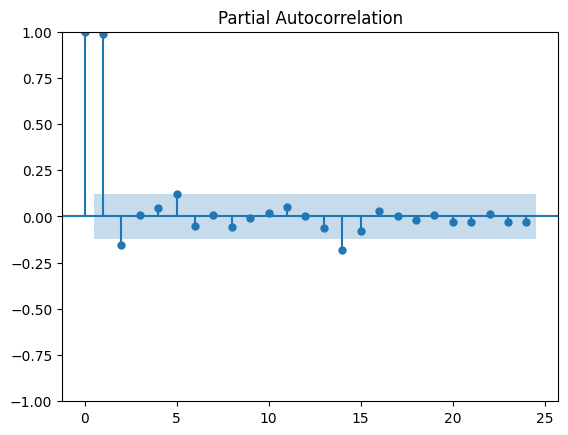

In [129]:
plot_pacf(np_yf_cvals**2)
plt.show()